In [1]:
import os
import dask_image.imread
import dask_image.ndfilters
import dask.array as da
import dask_image.ndmeasure
from dask.distributed import LocalCluster, Client
import dask.dataframe as dd
from dask import *
import imageio
import numpy as np

import matplotlib.pyplot as plt

In [2]:
cluster = LocalCluster()
client = Client(cluster)

distributed.diskutils - INFO - Found stale lock file and directory '/mnt/c/Users/aympa/source/repos/git_sophia/BigDataHadoopSparkDaskCourse/TPs/Project/Project/Dask/dask-worker-space/worker-9jyxlivy', purging
distributed.diskutils - INFO - Found stale lock file and directory '/mnt/c/Users/aympa/source/repos/git_sophia/BigDataHadoopSparkDaskCourse/TPs/Project/Project/Dask/dask-worker-space/worker-cb880xpw', purging
distributed.diskutils - INFO - Found stale lock file and directory '/mnt/c/Users/aympa/source/repos/git_sophia/BigDataHadoopSparkDaskCourse/TPs/Project/Project/Dask/dask-worker-space/worker-ftj9qy8k', purging
distributed.diskutils - INFO - Found stale lock file and directory '/mnt/c/Users/aympa/source/repos/git_sophia/BigDataHadoopSparkDaskCourse/TPs/Project/Project/Dask/dask-worker-space/worker-pm78741c', purging


# Reading Data

In [3]:
#Dask reads the pics
data_dir = 'flower_images'
filename_pattern = os.path.join(data_dir, '*.png')
flower_images = dask_image.imread.imread(filename_pattern)
flower_images

,Array,Chunk
Bytes,13.06 MiB,64.00 kiB
Shape,"(209, 128, 128, 4)","(1, 128, 128, 4)"
Count,627 Tasks,209 Chunks
Type,uint8,numpy.ndarray


(128, 128, 4)

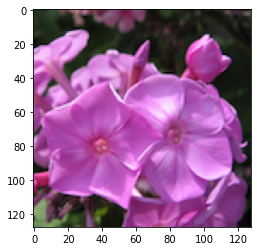

In [4]:
plt.imshow(flower_images[1,...])
flower_images[1,...].shape

# Converting to gray scale

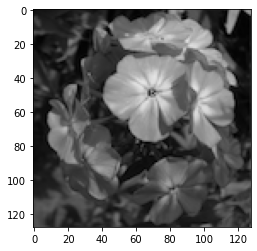

In [5]:
from PIL import Image

test = np.array(flower_images[0,...])
img = Image.fromarray(test)
grey = img.convert('LA')
plt.imshow(grey)

def grayscale(cmyk):
    print(cmyk[...,][0])
    return cmyk

    return Image.fromarray(np.array(cmyk[...,:])).convert('LA')
    # cmyk = np.array(cmyk[...,:])
    # img = Image.fromarray(cmyk[...,:).convert('LA')
    
    return img
    
    # grey = img.convert('LA')
    
    # result = ((rgb[..., 0] * 0.2125) +
    #           (rgb[..., 1] * 0.7154) +
    #           (rgb[..., 2] * 0.0721))
    return result

dask.array<getitem, shape=(128, 128, 4), dtype=uint8, chunksize=(128, 128, 4), chunktype=numpy.ndarray>
Shape before process : (209, 128, 128, 4)
Shape after process : (209, 128, 128, 4)


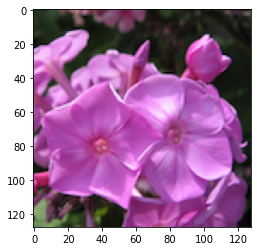

In [6]:
flowers_grey = grayscale(flower_images)

print("Shape before process :", flower_images.shape)
print("Shape after process :", flowers_grey.shape)

# flowers_grey.visualize()
plt.imshow(flowers_grey[1,...])

# Applying segmentation

In [7]:
%gui qt
import napari
# specify contrast_limits and multiscale=False with big data
# to avoid unnecessary computations
napari.view_image(flowers_grey, contrast_limits=[0,2000],)

/home/aympab/local/anaconda3/envs/hadoop-spark/lib/python3.9/site-packages/napari/_qt/__init__.py:53: UserWarning: 

napari was tested with QT library `>=5.12.3`.
The version installed is 5.9.7. Please report any issues with
this specific QT version at https://github.com/Napari/napari/issues.
  warn(message=warn_message)


In [ ]:
cluster.stop()